In [7]:
import geojson, json
import geopandas as gpd
import pandas as pd
from shapely import geometry

In [15]:
meta = {}
meta['fields'] = {'path':'../data/assets/fields.geojson','name':'Fields','color':'#6c0093'}
meta['lng'] = {'path':'../data/assets/lng.geojson','name':'LNG','color':'#46beb1'}
meta['coal_mines'] = {'path':'../data/assets/coal_mines.geojson','name':'Mines','color':'#89163e'}
meta['ports'] = {'path':'../data/assets/ports.geojson','name':'Ports','color':'#7f5636'}
meta['pipelines'] = {'path':'../data/assets/pipelines.geojson','name':'Pipelines','color':'#006400'}
meta['processing_plants'] = {'path':'../data/assets/processing_plants.geojson','name':'Processing Plants','color':'#be46a6'}
meta['power_stations'] = {'path':'../data/assets/power_stations.geojson','name':'Power Stations','color':'#96b087'}
meta['railways'] = {'path':'../data/assets/railways.geojson','name':'Railways','color':'#646464'}
meta['well_pads'] = {'path':'../data/assets/well_pads.geojson','name':'Well Pads','color':'#001c49'}
meta['shipping_routes'] = {'path':'../data/assets/shipping_routes.geojson','name':'Shipping Routes','color':'#7f5636'}
meta['refineries'] = {'path':'../data/assets/refineries.geojson','name':'Refineries','color':'#be46a6'}

In [19]:
data = {}
data['fields'] = json.load(open(meta['fields']['path'],'r',encoding="ISO-8859-1"))

In [28]:
json.dump(meta,open('../data/assets/meta.json','w'))

In [13]:
### find the closes point between points and lines
ptset = 'ports'
linesets = 'shipping_routes'



for ii_p,pt in enumerate(data[ptset]['features'][300:1000]):
    pt_geom = geometry.Point(pt['geometry']['coordinates'])
    #print ('pt',pt_geom.x, pt_geom.y) #lon. lat
    closest_pts = []
    for ii_f,ft in enumerate(data[linesets]['features']):
        #print (ii_f)
        
        line_shp = geometry.shape(ft['geometry'])
        if line_shp.type=='MultiLineString':
            for ls in list(line_shp):
                closest_pts.append(ls.interpolate(ls.project(pt_geom)))
        elif line_shp.type=='LineString':
            closest_pts.append(line_shp.interpolate(line_shp.project(pt_geom)))
        else:
            print ('not line?', line_shp.type)
        #print (closest_pt) #lon,lat
        #V_inv takes lat,lon
        #dists = []
        #for close_pt in closest_pts:
        #    print (pt_geom, close_pt,V_inv([pt_geom.y,pt_geom.x], [close_pt.y, close_pt.x], miles=False))
    dists = []
    for close_pt in closest_pts:
        v_dist = V_inv([pt_geom.y,pt_geom.x], [close_pt.y, close_pt.x], miles=False)
        if v_dist is not None:
            dists.append(v_dist[0])
    dists = np.array(dists)

    #print ('dists',dists)
    
    print (ii_p, pt_geom, closest_pts[np.argmin(dists)], min(dists))
    #dists.append(V_inv([pt_geom.y,pt_geom.x], [closest_pt.y, closest_pt.x], miles=False)[0]) #lat,lon)
        
    min_dists.append(min(dists))


0 POINT (-12.49999999998445 7.533333332669574) POINT (-12.99854297721152 7.025623332388403) 78.63531
convergence failure
1 POINT (52.53333333345473 27.5333333338334) POINT (55.20000076 25.60000038) 134.467787
2 POINT (-70.14999999918425 -53.88333333334939) POINT (-71.09999847 -53.90000153) 62.485596
3 POINT (-17.43333333337117 14.683333332912) POINT (-17.88617335323626 14.56486876484163) 50.51729
4 POINT (-123.9333333335252 49.16666666654404) POINT (-123.8792267 49.15879059) 4.04221
5 POINT (105.016666665769 5.51666666648018) POINT (104.7406522907767 5.532000232788527) 30.630989
6 POINT (-6.800000000708632 62.2500000000006) POINT (-6.979894592724227 62.46996242119724) 26.225074
7 POINT (-80.6114789998049 28.41217799993642) POINT (-80.60894331911203 28.41148609511217) 0.260023
8 POINT (-82.80000000012646 21.91666666636874) POINT (-82.94144527930561 22.15914560816925) 30.563637
9 POINT (145.564563435226 43.34514175842244) POINT (145.7032499754503 43.05709388241092) 33.928215
10 POINT (13

83 POINT (107.6333333331756 -2.750000000137719) POINT (107.1400905621153 -2.6833433481443) 55.339283
84 POINT (-52.26666666624783 4.850000000055029) POINT (-52.14679521780293 5.449358711561429) 67.598412
85 POINT (107.3666670002294 21.03333299937805) POINT (107.3939519225613 20.26035651284461) 85.62537
86 POINT (-6.94999999964378 37.24999999939769) POINT (-6.996802013187652 36.62993023350036) 68.939366
87 POINT (-6.800000000683306 61.55000000038179) POINT (-7.322935683210956 62.18940887626908) 76.38606
88 POINT (10.89999999965099 63.53333333392425) POINT (8.999990463 64.00000763) 107.206135
89 POINT (2.433333333757498 6.350000000053658) POINT (2.5 4.999989986) 149.473652
90 POINT (117.5333333337336 -0.099999999961336) POINT (118.8314653867824 -0.608084511979365) 155.04121
91 POINT (23.66666666692661 70.66666666616403) POINT (23.39999008 71.14998627) 54.797794
92 POINT (-38.61666666665835 -12.75000000005361) POINT (-36.52989092903066 -13.7140715095244) 250.055123
93 POINT (170.300000001

166 POINT (-87.38786300085583 46.57941400046339) POINT (-76.25750732 44.19398117) 910.183497
167 POINT (-81.28333333320732 -4.450000000069219) POINT (-81.63918952002523 -4.347197317213425) 41.101212
168 POINT (130.9314428068045 33.93473699110738) POINT (130.9625185519315 34.0364424091801) 11.641072
169 POINT (-1.599999999986688 48.83333333386178) POINT (-1.886449980394578 49.77081753026188) 106.323595
170 POINT (-73.16666666661888 -36.73333333346957) POINT (-73.69371250191145 -36.47656981935168) 55.094631
171 POINT (-38.51666666678048 -12.96666666688369) POINT (-36.5947929915257 -13.85455491558521) 230.15811
172 POINT (-67.98333333292494 10.48333333311152) POINT (-67.40126265532381 11.40935534550656) 120.582591
173 POINT (17.60000000085404 42.91666666717344) POINT (16.64306823847384 42.1732775433045) 114.00522
174 POINT (33.7166666665543 34.96666666675139) POINT (34.20000076 35.19998169) 51.116112
175 POINT (7.016666666965119 43.55000000057687) POINT (7.12705947495721 43.30230250714436

249 POINT (130.799999999789 42.65000000005732) POINT (131.4390293196093 41.85121444861696) 103.215737
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
250 POINT (-40.05000000005028 -19.84999999955066) POINT (-34.70000076 -8.800009727000001) 59.093184
251 POINT (-133.9251860002592 56.96306499983184) POINT (-133.9507599 56.97583008) 2.107162
252 POINT (-94.81009000006111 29.31308699960258) POINT (-94.81018652897235 29.31044140212458) 0.29339
253 POINT (-139.0333333338445 -9.816666666284592) POINT (-139.0347318768219 -10.00708932925269) 21.062673
254 POINT (-105.2666666665981 20.61666666740752) POINT (-105.9586746785551 19.6939916629562) 125.169737
255 POINT (9.599999999971509 59.19999999998309) POINT (9.826033258271762 58.70273467812133) 56.89966
256 POINT (141.45000000038 38.44999999979437) POINT (142.0378365905754 38.39347334367984) 51.7

328 POINT (49.28333333381224 -12.26666666666523) POINT (50.40832449538389 -12.04166586037113) 124.948522
329 POINT (130.5824027605048 32.78174274462884) POINT (129.5504602431875 33.44514584492563) 121.20067
330 POINT (145.5833333338601 43.33333333310397) POINT (145.7138721091393 43.06220812588848) 31.935127
331 POINT (-149.5833333327479 -17.53333333290996) POINT (-149.621637875306 -17.55295546272017) 4.610463
332 POINT (-123.71666666717 48.93333333366991) POINT (-123.7122377262764 48.94120767227751) 0.933877
333 POINT (-81.61950100009553 30.35824300022216) POINT (-81.61839959744054 30.35844350447355) 0.108194
334 POINT (-5.616666666270742 54.26666666664185) POINT (-5.416064876287267 54.19502468338958) 15.320665
335 POINT (-124.4333333342266 48.55000000021577) POINT (-124.4736268932629 48.41171621354039) 15.662988
336 POINT (-57.97589615861257 -31.38625720574379) POINT (-59.28565038143467 -33.69028279451043) 283.579007
337 POINT (11.30000000028421 63.75000000037804) POINT (8.999990463 6

410 POINT (-70.32194420378531 -18.51583817858527) POINT (-71 -18.90000916) 83.204303
411 POINT (-68.89832599992889 44.45143299964203) POINT (-68.92513410008884 44.4511905058323) 2.13398
412 POINT (-71.49125063370141 -32.75279790263614) POINT (-72.02841859827601 -32.8791919954595) 52.220395
413 POINT (23.40000000012768 37.96666666640956) POINT (24.35946083 37.66410828) 90.911749
414 POINT (102.1237756605569 2.244194840733664) POINT (101.9495433007518 2.043901611362428) 29.430871
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
415 POINT (19.93333333359658 39.61666666662219) POINT (6 42.79999924) 59.487835
416 POINT (6.150000000595784 60.3666666664669) POINT (4.196779310245395 60.25812025427147) 108.631751
417 POINT (141.0166666670775 43.20000000002612) POINT (139.8589665686526 43.43747843787902) 97.545382
418 POINT (-46.04999999974271 60.7166666660045) POINT (-46.43093754483854

convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
convergence failure
491 POINT (-89.93492400008856 30.00703499988438) POINT (-89.02364349 30.27909088) 0.018339
492 POINT (121.0500000002807 40.06666666714229) POINT (121.9999771 38.70000076) 172.395678
493 POINT (139.8338489632846 35.5818173275669) POINT (140.4029388 35.20108032) 66.764519
494 POINT (-1.183333333005951 54.70000000012476) POINT (-0.8812730359923049 54.96430300891728) 35.248306
495 POINT (-76.43333333386094 44.20000000012629) POINT (-76.25750732 44.19398117) 14.071491
496 POINT (94.39294299914388 16.02997499996583) POINT (94.81563363206219 15.06150886015222) 116.362501
497 POINT (7.299999999879171 3.983333333485074) POINT (7.064605287567093 3.344805085716644) 75.29479
498 POINT (-2.600000000093133 59.2333333332417) POINT (-2.525819668228004 58.86078153780031) 41.718586
499 POINT (-6.250000000254365 53.349999999856

570 POINT (-3.083333333219256 58.43333333361466) POINT (-3.038267371684303 58.63361437578313) 22.462627
571 POINT (109.0000000000098 -7.733333333741037) POINT (108.837511870918 -8.280701613347283) 63.131261
572 POINT (140.0666666663903 35.58333333328331) POINT (140.4029388 35.20108032) 52.267965
573 POINT (-126.1166666667913 49.68333333375748) POINT (-126.4457074672018 49.13862748068809) 65.116625
574 POINT (0.540635950676561 49.46739420700737) POINT (0.09999000281000001 49.89999008) 57.673023
575 POINT (-71.06666666657378 9.783333333518625) POINT (-71.75552068375693 12.56528624440883) 316.791361
576 POINT (-83.78536599971025 45.41156799995868) POINT (-76.25750732 44.19398117) 610.506322
577 POINT (-176.1333333336743 -13.28333333283726) POINT (-175.4537134769787 -14.17179114778331) 122.741158
578 POINT (-63.1500000000256 44.78333333333742) POINT (-63.06594890704598 44.57567597246465) 24.018992
579 POINT (141.6333333336875 42.63333333345347) POINT (141.6333374296597 41.89999222107655) 8

653 POINT (121.7021890722421 29.98373114901062) POINT (122.1906672261496 29.76198208895153) 53.209425
654 POINT (140.9100750645261 36.91288906935767) POINT (141.564875918506 36.69462292561933) 63.255428
655 POINT (-68.12828886789077 10.49832946207137) POINT (-67.51192245588302 11.47891289838602) 127.682499
656 POINT (-64.09999999959885 10.9000000003245) POINT (-64.22783580252155 11.52001488622164) 69.990228
657 POINT (-80.09999999952903 45.31666666638885) POINT (-76.25750732 44.19398117) 328.796964
658 POINT (-5.883333332917511 57.24999999960001) POINT (-6.268640783335569 57.66741660934085) 51.92179
659 POINT (3.716468791730824 51.44588789622104) POINT (3.400000095 51.49998856) 22.79768
660 POINT (-127.0833333332635 50.58333333332952) POINT (-127.0277486047136 50.66182077240511) 9.576174
661 POINT (-63.04999999985053 18.01666666701386) POINT (-63.18901673121982 17.86591150807525) 22.255431
662 POINT (-51.18333333350225 -0.049999999907214) POINT (-49.06751447118813 1.478089143457306) 28

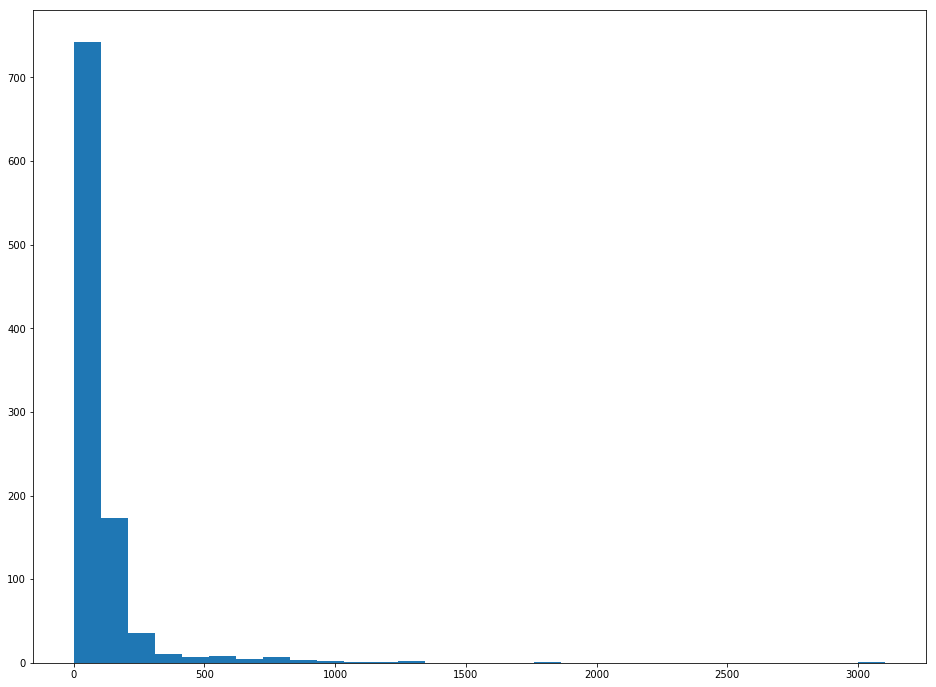

In [15]:
fig, axs = plt.subplots(1,1,figsize=(16,12))
hist_res = axs.hist(min_dists,30)
plt.show()